# Standard $\Lambda$CDM model of cosmology
## Supernovae, goodness of fit, MCMC

### Dhiraj Kumar Hazra, IMSc, Chennai


We will be discussing codes to compute the following quantities

* Luminosity distance
* Distance modulus
* $\chi^2$
* Best fit
* Grid likelihood

### References

* Cosmology, Steven Weinberg
* Theoretical Astrophysics, Vol III, T. Padmanabhan
* Wayne Hu's UChicago lecture notes
* Kauffmann’s lectures MPA

In [8]:
import numpy as np

#### Import the necessary libraries

We will not use astropy for the moment. This is for the reference. We can also cross check our results from the Astropy libraries

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
from matplotlib import rc
from scipy import integrate 
rc('text', usetex=True)

**Constants** 

We will need constants such as speed of light and unit conversion factors etc. I have stored them in constants.py file

**Planck**

While we will constrain the cosmological parameters using observations in the upcoming lectures, to calculate cosmological quantities based on a baseline cosmology and the baseline parameter values, we need the best fit/mean values of the parameters. Here in Planckbf.py I have noted down the Planck 2018 baseline bestfits. 


In [10]:
import constants as const 
import Planckbf as Pl

## Friedmann Equations

1. $$H^2=\left(\frac{\dot a}{a}\right)^2=\frac{8\pi G}{3}\rho - \frac{Kc^2}{a^2}$$

2. $$\dot{H}+H^2=\left(\frac{\ddot a}{a}\right)=-\frac{4\pi G}{3}\left(\rho+\frac{3p}{c^2}\right)$$

### Defining redshifts

In [11]:

# Concept of Redshift
def az(z):
    az=1.0/(1+z)
    return az


In [12]:
def deta(a,Om_m,Om_l,Om_r,H0):
    Om_k=1-Om_m-Om_l-Om_r
    asquareH=H0*np.sqrt((Om_m*a)+Om_r+(Om_k*a**2)+Om_l*a**4)
    deta=const.CKm/asquareH
    return deta

def eta(a,Om_m,Om_l,Om_r,H0):
    #In Mpc
    eta=integrate.romberg(deta,0,a,args=(Om_m,Om_l,Om_r,H0),rtol=1e-2)    
    return eta    


Omm=Pl.Omega_mB
Oml=Pl.Omega_lB
Omr=Pl.Omega_rB
H0=Pl.H0B

## Distances

### Comoving distance

As mentioned before the comoving distance is given by,

$$d_C(z)=f\left(\int^{t(z)}_0\frac{c dt}{a(t)}\right)$$

we define integral for flat case for now. However, it is trivial to change the integral to a $\sin$ or $\sinh$ function.

In [13]:
def Comov_Distance(a,Om_m,Om_l,Om_r,H0):
    #In Mpc
    Comov_Distance=integrate.romberg(deta,a,1,args=(Om_m,Om_l,Om_r,H0)
    ,rtol=1e-2)    
    return Comov_Distance    

### Angular diameter distance

Defined as (flat universe):

$$d_A(z)=a(z)d_C(z)$$

In [3]:
def Ang_Diam_Distance(a,Om_m,Om_l,Om_r,H0):
    #In Mpc
    Ang_Diam_Distance=a*Comov_Distance(a,Om_m,Om_l,Om_r,H0)
    return Ang_Diam_Distance    

### Luminsity distance

Defined as:

$$d_L(z)=d_C(z)/a(z)=d_A(z)/a^2(z)$$

In [2]:
def Lum_Distance(a,Om_m,Om_l,Om_r,H0):    
    Lum_Distance=Ang_Diam_Distance(a,Om_m,Om_l,Om_r,H0)/a**2
    return Lum_Distance      

### Distance modulus

$$\mu=m-M=5\log_{10}\left[d_L(\mathrm{Mpc})\right]+25$$

In [16]:
def distance_modulus(z,Om_m,Om_l,Om_r,H0):
    a=az(z)
    distance_modulus=5.0* np.log10(Lum_Distance(a,Om_m,Om_l,Om_r,H0)) + 25.0
    return distance_modulus

#### Plot the distance modulus

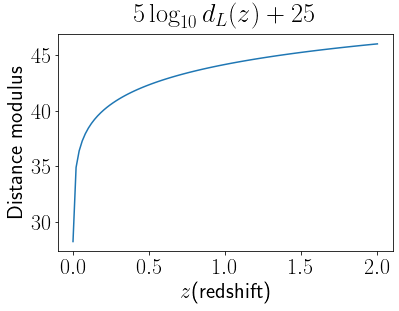

In [17]:
z=np.linspace(1e-3,2,100)

mu=np.zeros(len(z))
for i in range(len(z)):
    mu[i]=distance_modulus(z[i],Omm,Oml,Omr,H0)

plt.plot(z,mu)
plt.xlabel("$z$(redshift)")
plt.ylabel("Distance modulus")
plt.title(r'$5\log_{10}d_L(z)+25$')
plt.show()


## Supernovae Data

Union 2.1

**First plot the data to see how it looks**

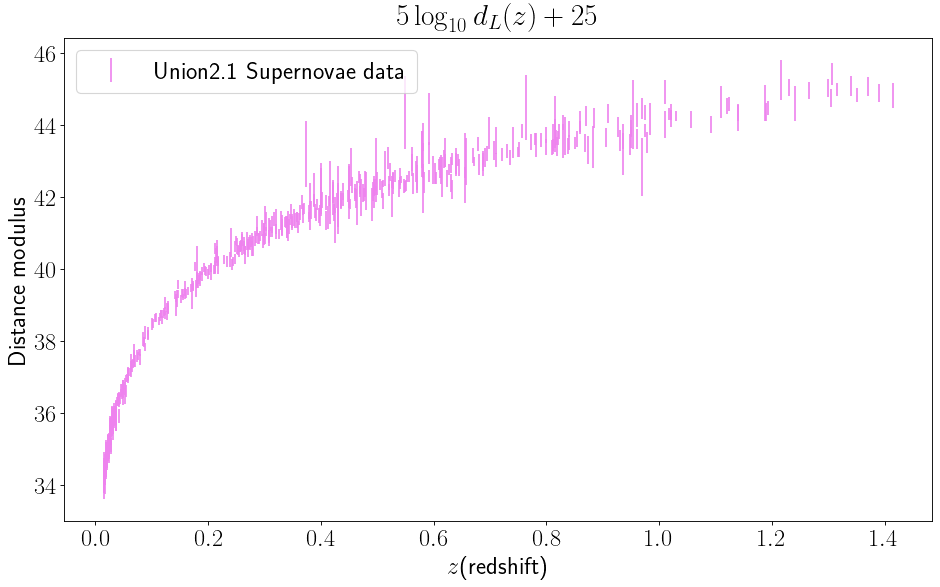

In [18]:
## Read data
z_SN,mu_SN,Delta_mu_SN=np.loadtxt('Data/sn_z_mu_dmu_plow_union2.1.txt',usecols=(1, 2, 3),  unpack=True)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.scatter(z_SN,mu_SN,alpha=0.3,s=8)
plt.errorbar(z_SN,mu_SN,yerr=Delta_mu_SN, linestyle="",
             label='Union2.1 Supernovae data',c='violet')
plt.xlabel("$z$(redshift)")
plt.ylabel("Distance modulus")
plt.title(r'$5\log_{10}d_L(z)+25$')
plt.legend()
plt.show()


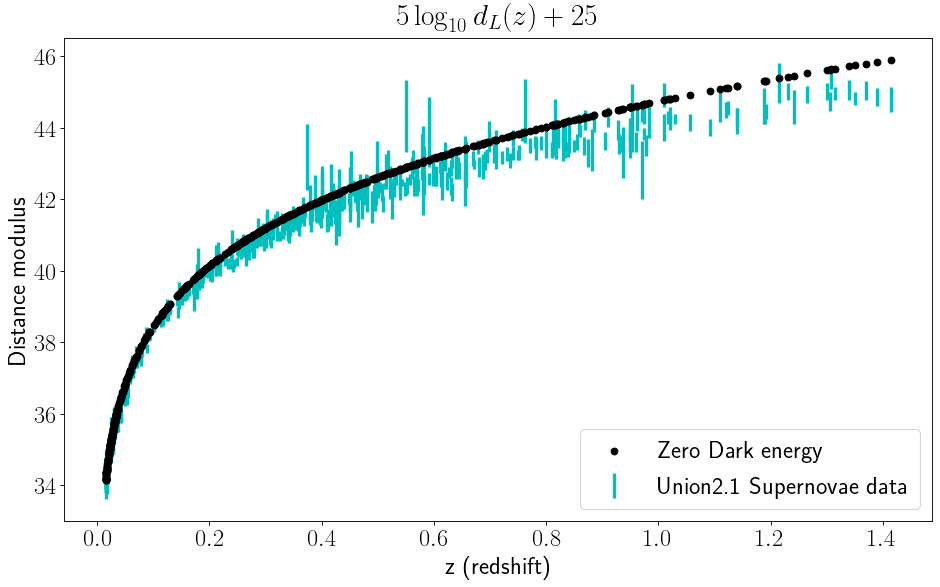

In [21]:
def dt_da_LCDM(a,Om_m,Om_l,Om_r,H0):
    Om_k=1-Om_m-Om_l-Om_r
    da_dt=H0*np.sqrt((Om_m*a)+Om_r+(Om_k*a**2)+Om_l*a**4)
    dt_da=a/da_dt
    return dt_da

def Age_Universe(a,Omm,Oml,Omr,H0):
    Om_m=Omm
    Om_l=Oml
    Om_r=Omr
    H0=H0
    Age_Universe= integrate.romberg(dt_da_LCDM,0,a,
                                    args=(Om_m,Om_l,Om_r,H0),
                                    rtol=1e-3)*const.MPc/const.Km/const.Gyr
    return Age_Universe

Age_SN=np.zeros(len(z_SN))

for i in range(len(z_SN)):
    Age_SN[i]=Age_Universe(1./(1.+z_SN[i]),Omm,Oml,Omr,H0)

    
    
Omm_zerom=0
Oml_zerom=1-Pl.Omega_rB
Omr=Pl.Omega_rB
H0=Pl.H0B    


Omm_zerol=1-Pl.Omega_rB
Oml_zerol=0
Omr=Pl.Omega_rB
H0=Pl.H0B    


mu_T=np.zeros(len(z_SN))

for i in range(len(z_SN)):
        mu_T[i]=distance_modulus(z_SN[i],Omm_zerom,Oml_zerom,Omr,H0)

    
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(z_SN,mu_T,c='k',zorder=5,linestyle="-",label='Zero Dark energy')
plt.errorbar(z_SN,mu_SN,yerr=Delta_mu_SN, linestyle="",linewidth=3,
             label='Union2.1 Supernovae data',c='c',zorder=0)
plt.xlabel("z (redshift)")
plt.ylabel("Distance modulus")
plt.title(r'$5\log_{10}d_L(z)+25$')
plt.legend()
plt.savefig("Union-2.1-samples.png")

## Definition of goodness of fit

In simplest form:

$$\chi^2=\sum_{i=1}^{N}\left(\frac{D(i)-T(i)}{\sigma_i}\right)^2$$,

Here we have $N$ data points $D(i)$ and errors $\sigma(i)$. We estimate our theory $T(i)$ for a given set of parameters $\Theta$. To get the optimized $\Theta$, we should minimize $\chi^2$.

However, given the _**error covariance**_ the $\chi^2$ should be calculated as:

$$\chi^2=\sum_{i=1}^{N}\left[D(i)-T(i)\right]^T COV^{-1}\left[D(i)-T(i)\right]$$,

$COV^{-1}$ is the inverse covariance matrix where the diagonal terms are $1/\sigma^2(i)$


In [23]:
# Define \chi^2

def chisq_simple(D,T,E):
    chisq_simple=np.sum(((D-T)/E)**2.0)
    return chisq_simple


### Find bestfit (grid based)

## _**NOTE THAT HIGH REDSHIFT SUPERNOVAE DATA CAN NOT CONSTRAIN $H_0$. HERE WE ARE SHOWING A TOY EXAMPLE WHERE WE NEGLECT THE OFF-DIAGONAL TERMS IN THE $\chi^2$ CALCULATION. THEREFORE HERE CONSTRAINTS ON $H_0$ WILL SIMPLY MEAN A CONSTRAINT ON SOME AD-HOC AMPLITUDE PARAMETER. USE OF FULL COVARIANCE MATRIX TAKING INTO ACCOUNT THE SYSTEMATIC EFFECTS WILL LEAD TO NO CONSTRAINTS IN $H_0$.**_

In [25]:
mu_T=np.zeros(len(z_SN))

for i in range(len(z_SN)):
    mu_T[i]=distance_modulus(z_SN[i],Omm,Oml,Omr,H0)

print('$\chi^2$ test:',chisq_simple(mu_SN,mu_T,Delta_mu_SN))

def SN_Chisq(params):
    Omm,H0=params
    Oml=1-Omm-Pl.Omega_kB-Pl.Omega_rB
    Omr=Pl.Omega_rB

    mu_T=np.zeros(len(z_SN))
    if Omm<0. or Omm >1 or H0 <30 or H0 > 100: 
        return np.inf

    for i in range(len(z_SN)):
        mu_T[i]=distance_modulus(z_SN[i],Omm,Oml,Omr,H0)

    SN_Chisq=chisq_simple(mu_SN,mu_T,Delta_mu_SN)
#    print(SN_Chisq)
    return SN_Chisq

def SN_loglike(params):
#   This is -\chi^2/2 
    SN_loglike=-0.5*SN_Chisq(params)
    return SN_loglike



def find_bestfit(bounds,tries):    
    best_chisq=1e30
    chisq_save=np.zeros((tries,tries))    
    omm_array=np.linspace(bounds[0][0],bounds[0][1],tries)     
    H0_array=np.linspace(bounds[1][0],bounds[1][1],tries)     
    for i in range(tries):
        for j in range(tries):
            params=[omm_array[i],H0_array[j]]
            chisq=SN_Chisq(params)
            chisq_save[i][j]=chisq
            if chisq<best_chisq :
                best_chisq=chisq
                bestfit=[omm_array[i],H0_array[j]]
    return bestfit,best_chisq 

bounds = [[0.1, 1], [30, 100]]

#Simple grid optimizer
print('Best fit from grid search:',find_bestfit(bounds,20))

$\chi^2$ test: 657.5062700687828
Best fit from grid search: ([0.24210526315789474, 70.52631578947368], 565.8038087209911)


Best-fit parameters: [ 0.27753905 70.00236269] $\chi^2$ 562.226017911675
     fun: 562.226017911675
     jac: array([2.21252441e-04, 6.86645508e-05])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 0.27753905, 70.00236269])


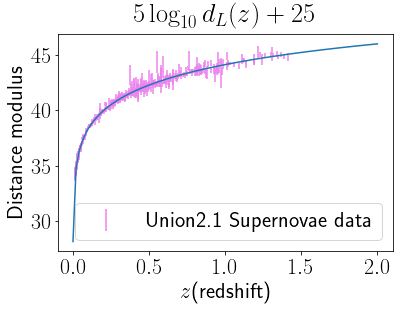

In [26]:
from scipy.optimize import minimize
from scipy.optimize import Bounds

Om_bestfit=0.27
H0_bestfit=70.0

bounds = Bounds([0.1, 1], [30, 100])
bestfit=minimize(SN_Chisq, [Om_bestfit, H0_bestfit],bounds=bounds,
                 method='SLSQP')
print('Best-fit parameters:', bestfit['x'], '$\chi^2$', bestfit['fun'])
print(bestfit)

Om_bestfit=bestfit['x'][0]
H0_bestfit=bestfit['x'][1]

Oml=1-Pl.Omega_rB-Om_bestfit
z=np.linspace(1e-3,2,100)

mu=np.zeros(len(z))
for i in range(len(z)):
    mu[i]=distance_modulus(z[i],Om_bestfit,Oml,Omr,H0_bestfit)

plt.plot(z,mu)
plt.errorbar(z_SN,mu_SN,yerr=Delta_mu_SN, linestyle="",
             label='Union2.1 Supernovae data',c='violet')
plt.xlabel("$z$(redshift)")
plt.ylabel("Distance modulus")
plt.title(r'$5\log_{10}d_L(z)+25$')
plt.legend()
plt.show()

### Deceleration parameter

In [27]:
def h_a(a,Om_m,Om_l,Om_r):
    #this is simply h(z)=H(z)/H_0
    Om_k=1-Om_m-Om_l-Om_r
    h_a=np.sqrt((Om_m/a**3.0)+Om_l+(Om_r/a**4.0)+(Om_k/a**2.0))
    return h_a

def dh_da(a,Om_m,Om_l,Om_r):
    #this is simply dh(z)/da
    Om_k=1-Om_m-Om_l-Om_r
    dh_da=0.5/h_a(a,Om_m,Om_l,Om_r)
    dh_da=dh_da*(-(3.0*Om_m/a**4.0)-(4.0*Om_r/a**5.0)-(2.0*Om_k/a**3.0))    
    return dh_da

def q(a,Om_m,Om_l,Om_r):
    #deceleration parameter
    q=-1.0-a*dh_da(a,Om_m,Om_l,Om_r)/h_a(a,Om_m,Om_l,Om_r)
    return q

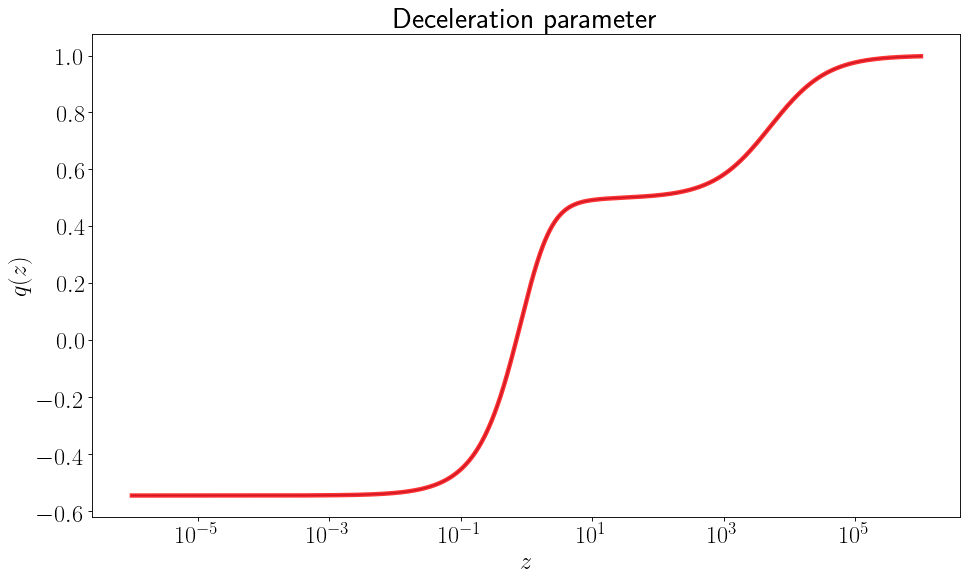

In [28]:
z=np.logspace(-6,6,1000)
a=np.zeros(len(z))
a=az(z)

Omm=Om_bestfit
Oml=Pl.Omega_lB
Omr=Pl.Omega_rB

# plotting deceleration parameter
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(z,q(a,Omm,Oml,Omr))
plt.xscale('log')
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.title('Deceleration parameter')
plt.plot(z, q(a,Om_bestfit,Oml,Omr), color="r", lw=4, alpha=0.8)

plt.savefig("Union-2.1-qz-samples.png")

## Assignments

1. Obtain the best fit for a non-flat Universe
2. Plot the 2D map of $-ln \mathcal{L}$. Importantly plot the $\mathcal{L}/\mathcal{L_\mathrm{max}}$ for flat case
3. Plot the contours
4. Find the standard deviations 
5. Remove the data before and after z=0.75 and obtain constraints from both (plot the likelihood )

## Markov Chain Monte Carlo

**We will use emcee routine to compare Supernovae data with standard $\Lambda$CDM cosmology. We have 2 free parameters, $\Omega_m$ and $H_0$. However, the constraint on $H_0$ should not be read as actual constraint as it is degenrate with the absolute magnitude.**

100%|██████████| 500/500 [23:22<00:00,  2.81s/it]


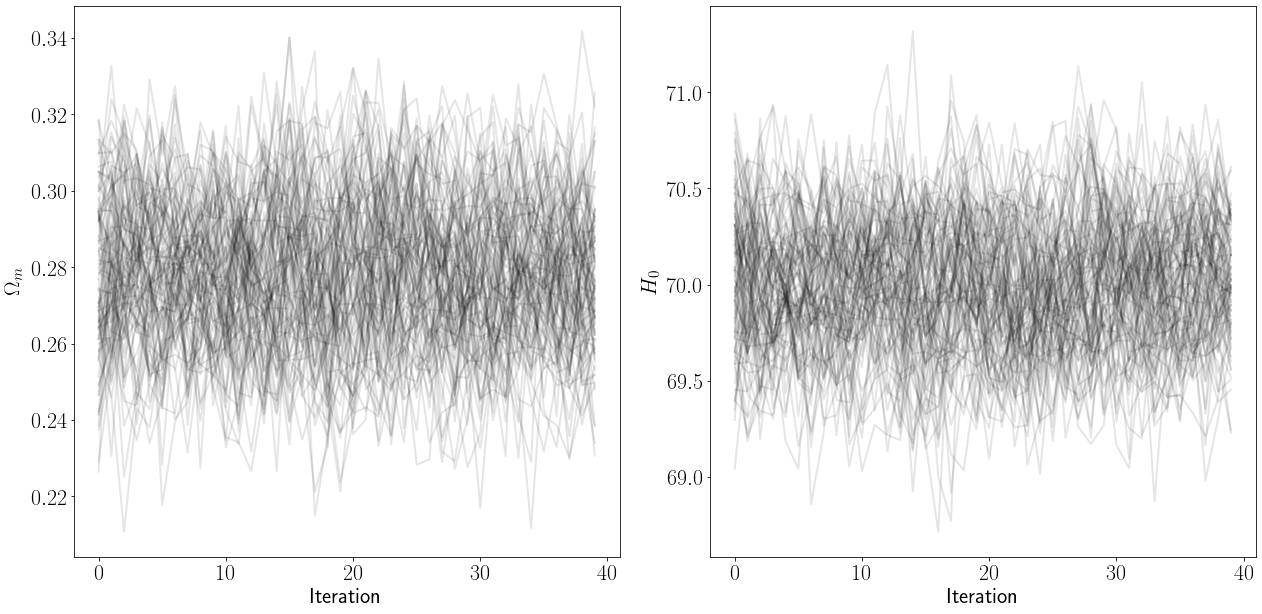

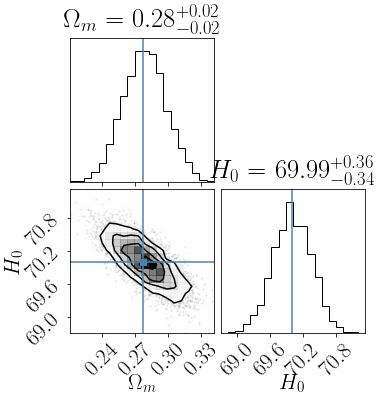

In [29]:
import emcee

# initial points
ndim, nwalkers = 2, 100 
p0 = np.random.normal([Om_bestfit,H0_bestfit], 
                      [0.1,10],
                      size=(nwalkers, ndim))
# sample
niter = 500
sampler = emcee.EnsembleSampler(nwalkers, ndim, SN_loglike)
sampler.run_mcmc(p0, niter, progress=True);

params = [r'$\Omega_m$', r'$H_0$']
thin, discard = 10, 100
# plot traces of parameters
plt.figure(figsize=(18, 9))
for i in range(ndim):
    plt.subplot(1, 2, i+1)
    plt.plot(sampler.get_chain(thin=thin, discard=discard)[:, :, i]
    , color='black', alpha=0.1, lw=2)
    plt.xlabel('Iteration')
    plt.ylabel(params[i])
plt.tight_layout()

import corner
# plot 1-D, 2-D marginal distributions
fig=corner.corner(sampler.get_chain(thin=thin, discard=discard, flat=True),\
              labels=params, show_titles=True,truths=bestfit['x']);

fig.savefig("Union-2.1.png")

## Bounds on the parameters

In [30]:
#samples[:, 1] = np.exp(samples[:, 1])
samples = sampler.chain[:, discard:, :].reshape((-1, ndim))
Omm_mcmc, H0_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
print(Omm_mcmc, H0_mcmc)

(0.2784234788310099, 0.019575097422554533, 0.019264310961633946) (69.99978734181994, 0.3496511481879452, 0.3380064315064004)


## Plotting the sample of distance modulus

In [31]:
def mu_samples(params,zarray):
    Omm,H0=params
    Oml=Pl.Omega_lB
    Omr=Pl.Omega_rB
    mu_samples=np.zeros(len(zarray))
    for i in range(len(zarray)):
        mu_samples[i]=distance_modulus(zarray[i],Omm,Oml,Omr,H0)        
    return mu_samples 
    
z=np.linspace(0.85,1.4,100)

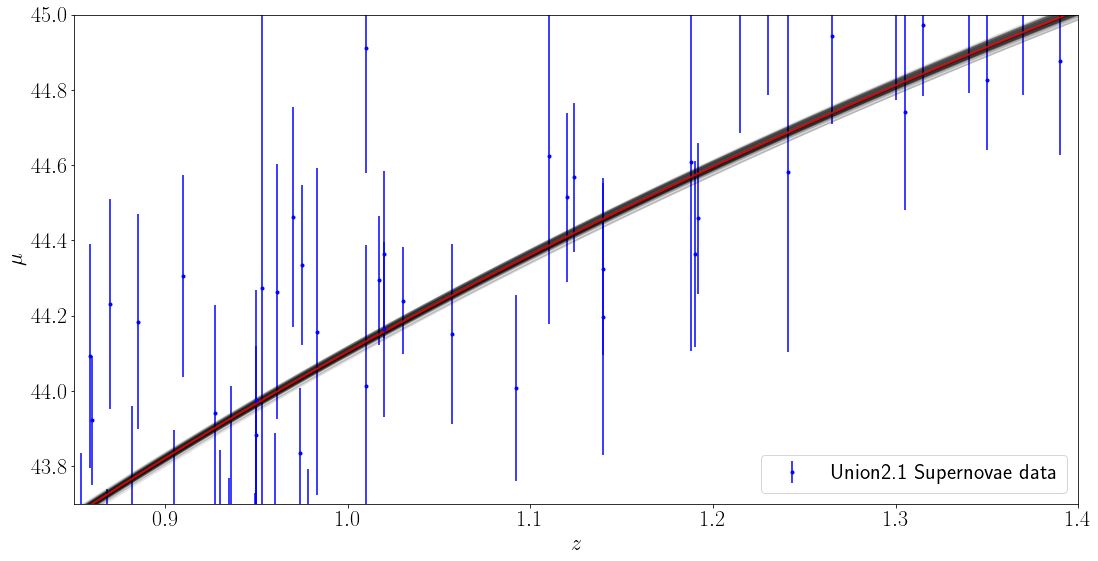

In [32]:
plt.figure(figsize=(18, 9))
for Omm, H0 in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(z, mu_samples([Omm, H0],z), color="k", alpha=0.1)
plt.xlim(z[0],z[-1])    
plt.ylim(43.7,45)    
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.plot(z, mu_samples([Om_bestfit,H0_bestfit],z), color="r", lw=2, alpha=0.8)
plt.errorbar(z_SN,mu_SN,yerr=Delta_mu_SN, linestyle="",
             label='Union2.1 Supernovae data',fmt=".b")
plt.legend()

plt.savefig("Union-2.1-samples.png")

## Plotting the samples of deceleration parameter

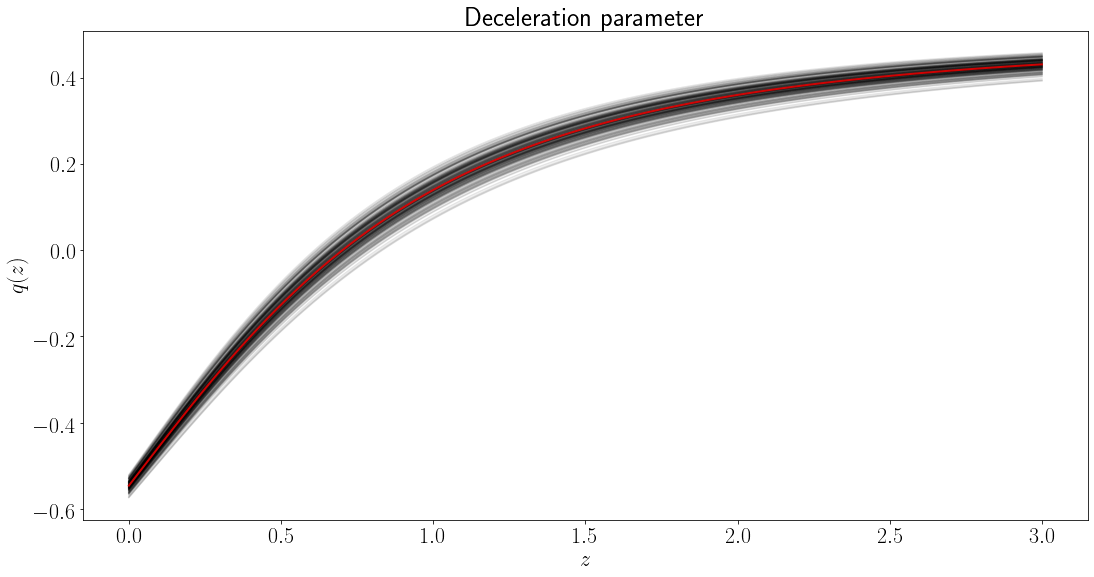

In [33]:
Omm_mcmc, H0_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))


z=np.linspace(0,3,100)
a=np.zeros(len(z))
a=az(z)

Omm=Om_bestfit
Oml=Pl.Omega_lB
Omr=Pl.Omega_rB

# plotting deceleration parameter
plt.figure(figsize=(18, 9))
for Omm, H0 in samples[np.random.randint(len(samples), size=200)]:
    plt.plot(z, q(a,Omm,Oml,Omr), color="k", alpha=0.1)
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.title('Deceleration parameter')
plt.plot(z, q(a,Om_bestfit,Oml,Omr), color="r", lw=2, alpha=0.8)

plt.savefig("Union-2.1-qz-samples.png")

## Read inverese covariance matrix
I am using it from cosmomc. It is already inverted

In [34]:
import numpy as np
iCovmat = np.loadtxt("Data/sn_wmat_sys_union2.1.txt")

# Define $\chi^2$

In [36]:
def chisq(Data,Theory,icovmat):
    diff=Data-Theory
    diffT=diff.T
    chisq=diffT.dot(icovmat.dot(diff))
    return chisq

In [37]:
# likelihood
def SN_Chisq_Proper(params):
    Omm,H0=params
    Oml=1-Omm-Pl.Omega_kB-Pl.Omega_rB
    Omr=Pl.Omega_rB

    mu_T=np.zeros(len(z_SN))
    if Omm<0. or Omm >1 or H0 <30 or H0 > 100: 
        return np.inf

    for i in range(len(z_SN)):
        mu_T[i]=distance_modulus(z_SN[i],Omm,Oml,Omr,H0)

    SN_Chisq_Proper=chisq(mu_SN,mu_T,iCovmat)
#    print(SN_Chisq)
    return SN_Chisq_Proper

def SN_loglike_covmat(params):
#   This is -\chi^2/2 
    SN_loglike_covmat=-0.5*SN_Chisq_Proper(params)
    return SN_loglike_covmat


100%|██████████| 500/500 [23:48<00:00,  2.86s/it]


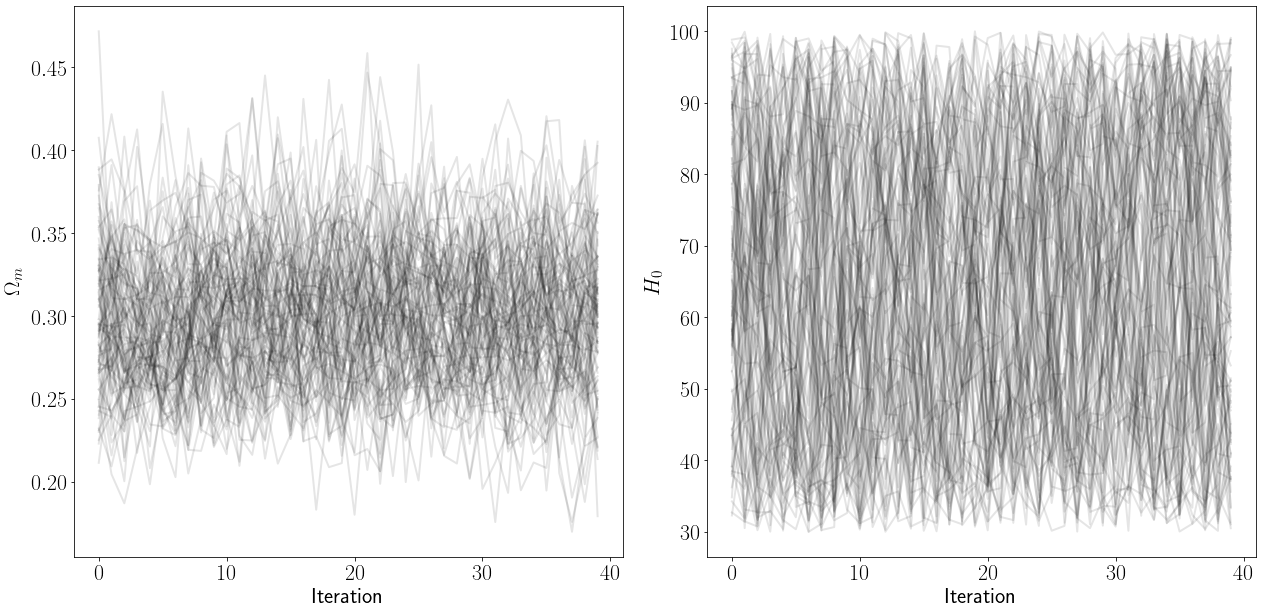

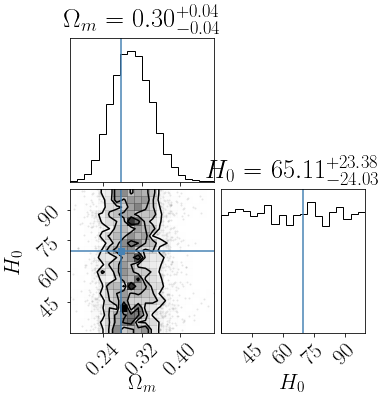

In [38]:
# initial points
ndim, nwalkers = 2, 100 
p0 = np.random.normal([Om_bestfit,H0_bestfit], 
                      [0.1,10],
                      size=(nwalkers, ndim))
# sample
niter = 500
sampler = emcee.EnsembleSampler(nwalkers, ndim, SN_loglike_covmat)
sampler.run_mcmc(p0, niter, progress=True);

params = [r'$\Omega_m$', r'$H_0$']
thin, discard = 10, 100
# plot traces of parameters
plt.figure(figsize=(18, 9))
for i in range(ndim):
    plt.subplot(1, 2, i+1)
    plt.plot(sampler.get_chain(thin=thin, discard=discard)[:, :, i]
    , color='black', alpha=0.1, lw=2)
    plt.xlabel('Iteration')
    plt.ylabel(params[i])
plt.tight_layout()

import corner
# plot 1-D, 2-D marginal distributions
fig=corner.corner(sampler.get_chain(thin=thin, discard=discard, flat=True),\
              labels=params, show_titles=True,truths=bestfit['x']);

fig.savefig("Union-2.1-Covmat-Sys.png")

## Assignments

* Constrain $\Omega_k-\Omega_m$